# 1<sup>st</sup> Laboratory Exercise
## Analysis & Study of Complex Network Topologies

# Nanos Georgios 03400144 (DSML)

<p style='text-align: justify;'> In this exercise, topologies will be created and analyzed, some of which are used to represent complex and / or social networks. The analysis will be done through the metric analysis presented in the lectures of the course. The networks to be studied are given in Table 1.</p>

<table width="80%">
    <caption>Table $1$: Complex networks and characteristic parameters</caption>
    <thead>
    <tr>
        <th>Network Type</th>
        <th>Model</th>
        <th>Identifier</th>
        <th>Parameters</th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Grid</td>
            <td style="background-color:#F2F4F7" rowspan="2">Finite</td>
            <td style="background-color:#F2F4F7" rowspan="2">REG</td>
            <td style="background-color:#F2F4F7">Nodes $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Degree $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="2">Random Graph</td>
            <td style="background-color:#FFFFFF" rowspan="2">Erdos-Renyi</td>
            <td style="background-color:#FFFFFF" rowspan="2">RG (ER)</td>
            <td style="background-color:#FFFFFF">Nodes $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Connections $M$</td>
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Random Graph</td>
            <td style="background-color:#F2F4F7" rowspan="2">Gilbert</td>
            <td style="background-color:#F2F4F7" rowspan="2">RG (G)</td>
            <td style="background-color:#F2F4F7">Nodes $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Probability connection $p$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Random geometric graph</td>
            <td style="background-color:#FFFFFF" rowspan="3">Level/Flat</td>
            <td style="background-color:#FFFFFF" rowspan="3">RGG</td> 
        </tr>
        <tr>
                <td style="background-color:#FFFFFF" >Radius $R$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Nodes $n$</td>  
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Scale-free</td>
            <td style="background-color:#F2F4F7" rowspan="2">Barabasi-Albert</td>
            <td style="background-color:#F2F4F7" rowspan="2">SF (BA)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Attachment parameter $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Small-world</td>
            <td style="background-color:#FFFFFF" rowspan="3">Watts-Strogatz</td>
            <td style="background-color:#FFFFFF" rowspan="3">SW (WS)</td>
            <td style="background-color:#FFFFFF">Nodes $n$ </td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Degree of initial grid $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">
Possibility of reconnection $g_p$</td>  
        </tr>
    </tbody>
</table>

In [38]:
seedno=600    #seed number !DO NOT CHANGE IT!

In [39]:
%matplotlib inline
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

## Α. Construction and visualization of complex network types

### REG topology for grid grade $d = 4$

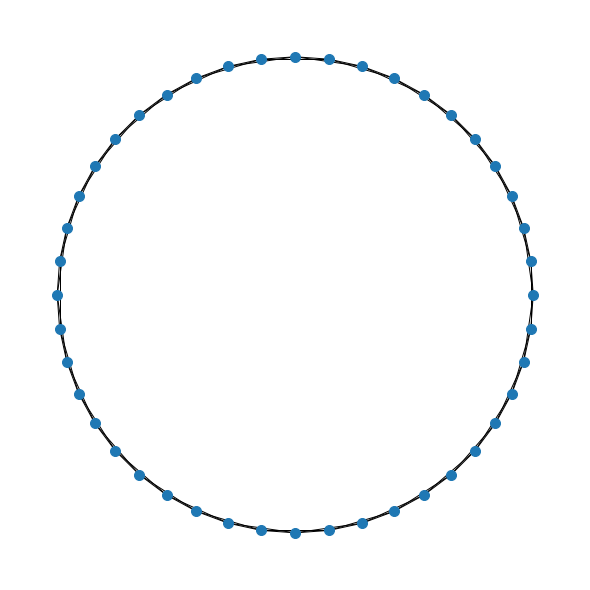

In [40]:
random.seed(seedno)
d=4
n=44
# to build REG use watts_strogatz_graph from networkx.
# Carefully select the value of the parameter p.
REG =  nx.watts_strogatz_graph(n, d, 0)
plt.figure(figsize=(8, 8))
plt.show(nx.draw_circular(REG, node_size=100))

### RG (ER) topology for number of connections $ M = $ 150

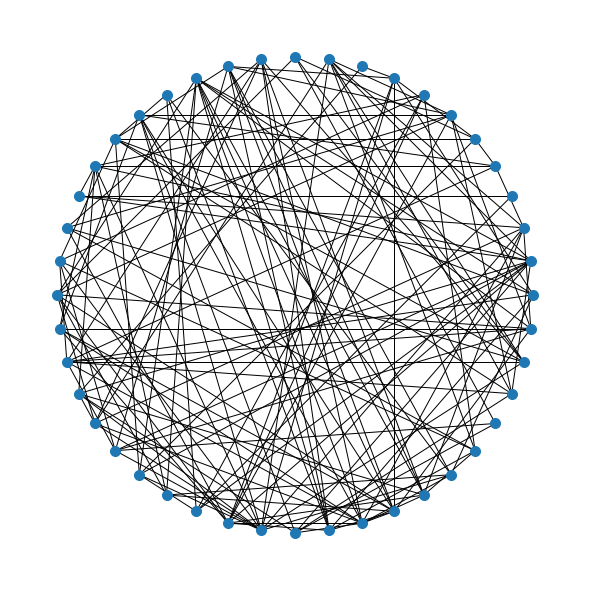

In [41]:
seedno1 = 1
random.seed(seedno1)
n=44
M = 150
RGER = nx.gnm_random_graph(n, M)
plt.figure(figsize=(8, 8))
plt.show(nx.draw_circular(RGER, node_size=100))

### RGG topology with connection radius $ R = 0.35 $

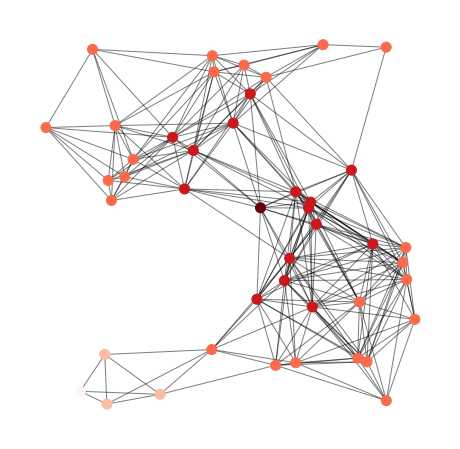

In [42]:
random.seed(seedno)
n=44
R=0.35

RGG = nx.random_geometric_graph(n, R)
pos = nx.get_node_attributes(RGG, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(RGG, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(RGG, pos, node_size = 100, alpha=0.5)
nx.draw_networkx_nodes(
    RGG,
    pos,
    nodelist=list(p.keys()),
    node_size=100,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)
plt.axis("off")
plt.show()

# A second representation of RGG

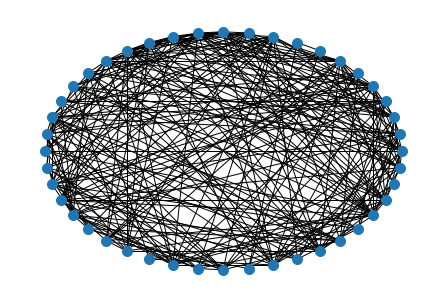

In [43]:
plt.show(nx.draw_circular(RGG, node_size=100))

### SF topology with attachment parameter $ d = 4 $

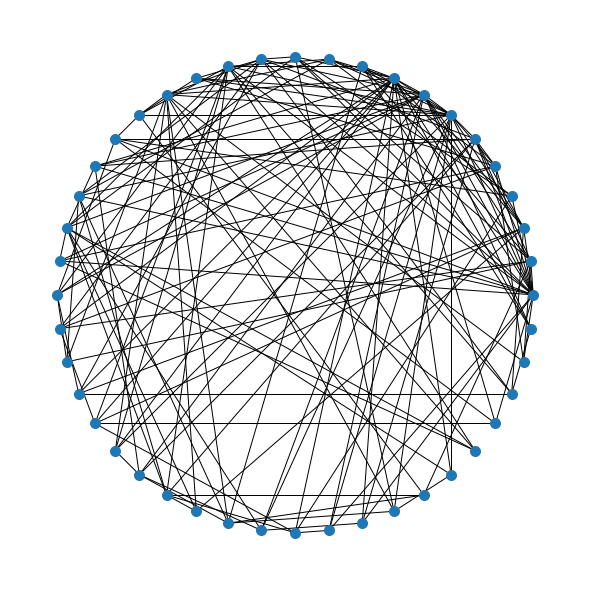

In [44]:
random.seed(seedno)
n=44 
d=4

SF = nx.barabasi_albert_graph(n, d)

plt.figure(figsize=(8, 8))
plt.show(nx.draw_circular(SF, node_size=100))

### SW topology with degree of initial lattice $ d = 4 $ and probability of reconnection $ p = 0.25 $

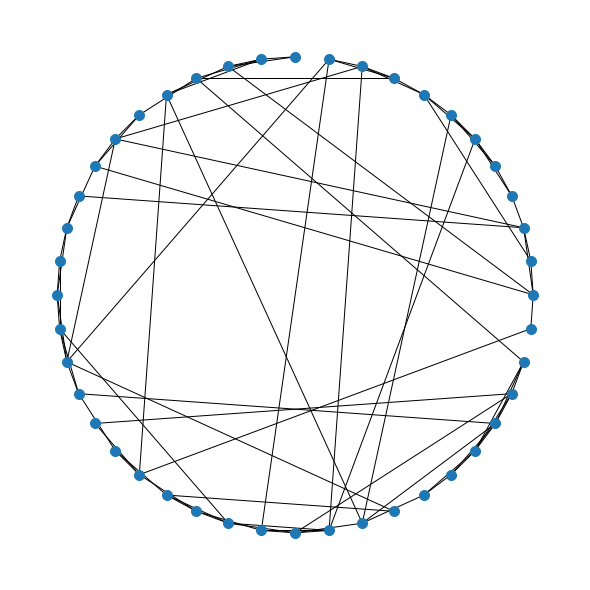

In [45]:
random.seed(seedno)
n=44
d=4
p=0.25
SW = nx.watts_strogatz_graph(n, d, p)
plt.figure(figsize=(8, 8))
plt.show(nx.draw_circular(SW, node_size=100))

## B. Network metrics

### B1.  Clustering coefficient

#### For each of the topologies REG, RG (ER), RGG, SF (BA) and SW (WS):
#### B1.1 Calculate the grouping factor of each node and represent its distribution.
#### B1.2 Calculate the average grouping factor and its dispersion.
#### Β.1.3 Find the nodes with the smallest and the largest grouping factor.
#### Comment on the results.

__Β1.1__

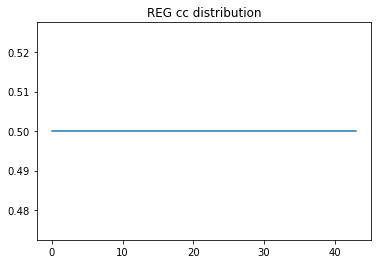

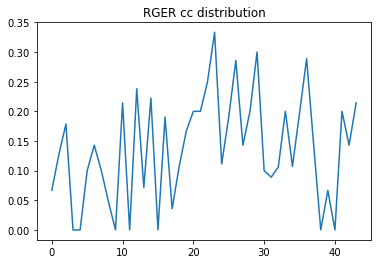

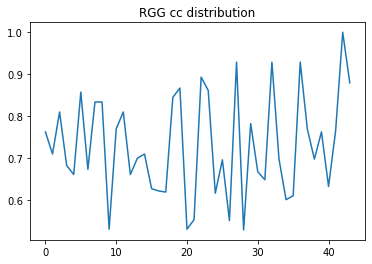

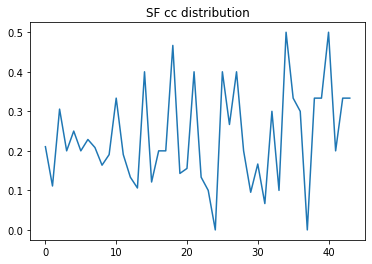

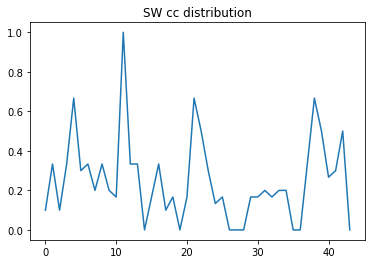

In [46]:
def cc(G):
    return nx.clustering(G)

REG_cc = cc(REG)
RGER_cc = cc(RGER)
RGG_cc = cc(RGG)
SF_cc = cc(SF)
SW_cc = cc(SW)

plt.plot(list(REG_cc.keys()), list(REG_cc.values()))
plt.title('REG cc distribution')
plt.show()

plt.plot(list(RGER_cc.keys()), list(RGER_cc.values()))
plt.title('RGER cc distribution')
plt.show()

plt.plot(list(RGG_cc.keys()), list(RGG_cc.values()))
plt.title('RGG cc distribution')
plt.show()

plt.plot(list(SF_cc.keys()), list(SF_cc.values()))
plt.title('SF cc distribution')
plt.show()

plt.plot(list(SW_cc.keys()), list(SW_cc.values()))
plt.title('SW cc distribution')
plt.show()

__Β1.2__

In [47]:
#Mean Values
print("Mean cc of REG : ", nx.average_clustering(REG))
print("Mean cc of RGER : ", nx.average_clustering(RGER))
print("Mean cc of RGG : ", nx.average_clustering(RGG))
print("Mean cc of SF : ", nx.average_clustering(SF))
print("Mean cc of SW : ", nx.average_clustering(SW))

print()
#Var Values

print("Variance cc of REG : ", np.array(list(REG_cc.values())).var())
print("Variance cc of RGER : ", np.array(list(RGER_cc.values())).var())
print("Variance cc of RGG : ", np.array(list(RGG_cc.values())).var())
print("Variance cc of SF : ", np.array(list(SF_cc.values())).var())
print("Variance cc of SW : ", np.array(list(SW_cc.values())).var())

Mean cc of REG :  0.5
Mean cc of RGER :  0.1381165551620097
Mean cc of RGG :  0.7292735167699985
Mean cc of SF :  0.2343917366134507
Mean cc of SW :  0.2522727272727273

Variance cc of REG :  0.0
Variance cc of RGER :  0.008138686810844113
Variance cc of RGG :  0.014867328339054707
Variance cc of SF :  0.01530116980349115
Variance cc of SW :  0.04507059228650138


__Β1.3__

In [48]:
# Nodes with max cc for each graph
print("Node with max cc is for REG is :  ", np.array(list(REG_cc.values())).argmax())
print("Node with max cc is for RGER is :  ", np.array(list(RGER_cc.values())).argmax())
print("Node with max cc is for RGG is :  ", np.array(list(RGG_cc.values())).argmax())
print("Node with max cc is for SF is :  ", np.array(list(SF_cc.values())).argmax())
print("Node with max cc is for SW is :  ", np.array(list(SW_cc.values())).argmax())

print()
# Nodes with min cc for each graph
print("Node with min cc is for REG is :  ", np.array(list(REG_cc.values())).argmin())
print("Node with min cc is for RGER is :  ", np.array(list(RGER_cc.values())).argmin())
print("Node with min cc is for RGG is :  ", np.array(list(RGG_cc.values())).argmin())
print("Node with min cc is for SF is :  ", np.array(list(SF_cc.values())).argmin())
print("Node with min cc is for SW is :  ", np.array(list(SW_cc.values())).argmin())

Node with max cc is for REG is :   0
Node with max cc is for RGER is :   23
Node with max cc is for RGG is :   42
Node with max cc is for SF is :   34
Node with max cc is for SW is :   11

Node with min cc is for REG is :   0
Node with min cc is for RGER is :   3
Node with min cc is for RGG is :   28
Node with min cc is for SF is :   24
Node with min cc is for SW is :   14


__Commenting on Results__

For REG and RGG graphs the presence or absence of an edge between two nodes is based solely on the distance between them, so it makes sense for the grouping factor to take higher values ​​than in the RGER, SF and SW graphs, where the presence of an edge is determined randomly. In the latter case, having an acne between 2 neighbors of a node is clearly more unlikely, which leads to lower grouping rates, of course, it is not unlikely that such a link exists, just less likely.

### Β2. Average path length - Diameter - Graph radius

#### For each of the topologies REG, RG (ER), RGG, SF (BA) and SW (WS):
#### B2.1 Calculate the average path length and its dispersion. It is recommended to use the all_pairs_shortest_path_length function of networkx.
#### B2.2 Calculate the diameter (diameter function) and the radius (radius function).
#### For the above make comparisons and explain based on the characteristics of each topology as presented in theory.

__Β2.1__

In [49]:
def compute_path_lengths(G):
    path_dict = dict(nx.all_pairs_shortest_path_length(G))
    path_dict_arr = [[]] * len(path_dict.values())
    means = [None] * len(path_dict.values())
    vars = [None] * len(path_dict.values())
    j = 0
    
    for value in path_dict.values():
        for i in range(len(path_dict.values())):
            if (i in value):
                path_dict_arr[j].append(value[i])
        means[j] = np.array(path_dict_arr[j]).mean()
        vars[j] = np.array(path_dict_arr[j]).var()
        j += 1
    return(means, vars)

REG_path_lengths = compute_path_lengths(REG)
RGER_path_lengths = compute_path_lengths(RGER)
RGG_path_lengths = compute_path_lengths(RGG)
SF_path_lengths = compute_path_lengths(SF)
SW_path_lengths = compute_path_lengths(SW)


print("Mean path length of REG: %f" %np.array(REG_path_lengths[0]).mean())
print("Variance of path length REG: %f" %np.array(REG_path_lengths[1]).var())

print("Mean path length of RGER: %f" %np.array(RGER_path_lengths[0]).mean())
print("Variance of path length RGER: %f" %np.array(RGER_path_lengths[1]).var())

print("Mean path length of RGG: %f" %np.array(RGG_path_lengths[0]).mean())
print("Variance of path length RGG: %f" %np.array(RGG_path_lengths[1]).var())

print("Mean path length of SF: %f" %np.array(SF_path_lengths[0]).mean())
print("Variance of path length SF: %f" %np.array(SF_path_lengths[1]).var())

print("Mean path length of SW: %f" %np.array(SW_path_lengths[0]).mean())
print("Variance of path length SW: %f" %np.array(SW_path_lengths[1]).var())


Mean path length of REG: 5.750000
Variance of path length REG: 0.000000
Mean path length of RGER: 2.162359
Variance of path length RGER: 0.002457
Mean path length of RGG: 2.221438
Variance of path length RGG: 0.007980
Mean path length of SF: 1.856307
Variance of path length SF: 0.000938
Mean path length of SW: 3.007955
Variance of path length SW: 0.000901


__Β2.2__

In [50]:
#calculate diameter
if nx.is_connected(REG):
    print("Diameter of REG is : ", nx.diameter(REG))
else:
    print("REG not connected but diameter = ", max([max(j.values()) for (i,j) in nx.shortest_path_length(REG)]))
    
if nx.is_connected(RGER):
    print("Diameter of RGER is : ", nx.diameter(RGER))
else:
    print("REG not connected but diameter : ", max([max(j.values()) for (i,j) in nx.shortest_path_length(RGER)]))
    
if nx.is_connected(RGG):
    print("Diameter of RGG is : ", nx.diameter(RGG))
else:
    print("REG not connected but diameter = ", max([max(j.values()) for (i,j) in nx.shortest_path_length(RGG)]))
    
if nx.is_connected(SF):
    print("Diameter of SF is : ", nx.diameter(SF))
else:
    print("REG not connected but diameter = ", max([max(j.values()) for (i,j) in nx.shortest_path_length(SF)]))

if nx.is_connected(SW):
    print("Diameter of SW is : ", nx.diameter(SW))
else:
    print("REG not connected but diameter = ", max([max(j.values()) for (i,j) in nx.shortest_path_length(SW)]))
    

print()

#calculate radius
if nx.is_connected(REG):
    print("Radius of REG is : ", nx.radius(REG))
else:
    print("REG not connected ")
    
if nx.is_connected(RGER):
    print("Radius of RGER is : ", nx.radius(RGER))
else:
    print("RGER not connected")
    
if nx.is_connected(RGG):
    print("Radius of RGG is : ", nx.radius(RGG))
else:
    print("RGG not connected")
    
if nx.is_connected(SF):
    print("Radius of SF is : ", nx.radius(SF))
else:
    print("SF not connected")

if nx.is_connected(SW):
    print("Radius of SW is : ", nx.radius(SW))
else:
    print("SW not connected")    

Diameter of REG is :  11
Diameter of RGER is :  4
Diameter of RGG is :  6
Diameter of SF is :  4
Diameter of SW is :  6

Radius of REG is :  11
Radius of RGER is :  3
Radius of RGG is :  3
Radius of SF is :  2
Radius of SW is :  4



As expected the co-variation of the REG topology is zero, as it also has the longest average path length of all topologies. At the same time, from theory we expected Scale-free (SF) to have the shortest average path length, which it did.


#### B.2.3 For each topology, which node is connected to most nodes with a minimum path length equal to the diameter of the topology?

__B2.3__

In [51]:
from collections import Counter
def find_nodes(G):
    max_ = 0
    max_nodes = []
    for i in range(len(G)):
        nx.shortest_path(G, i)
        d = nx.shortest_path_length(G, i)
        num_nodes = Counter(d.values())[ max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])]
        if num_nodes >=  max_ : 
            max_ = num_nodes
            max_nodes.append(i)
    return max_nodes, max_


Determine the label of the node and the set of nodes with which it is connected with a minimum path length equal to the diameter.

In [52]:
nodes, num_nodes = find_nodes(REG)
print("REG topology nodes that are connected with nodes with shortest path equal to diameter are : {} and the number of nodes each is connected is : " .format(nodes), num_nodes)

print()
nodes, num_nodes = find_nodes(RGER)
print("RGER topology nodes that are connected with nodes with shortest path equal to diameter are : {} and the number of nodes each is connected is : " .format(nodes), num_nodes)

print()
nodes, num_nodes = find_nodes(RGG)
print("RGG topology nodes that are connected with nodes with shortest path equal to diameter are : {} and the number of nodes each is connected is : " .format(nodes), num_nodes)

print()
nodes, num_nodes = find_nodes(SF)
print("SF topology nodes that are connected with nodes with shortest path equal to diameter are : {} and the number of nodes each is connected is : " .format(nodes), num_nodes)

print()
nodes, num_nodes = find_nodes(SW)
print("SW topology nodes that are connected with nodes with shortest path equal to diameter are : {} and the number of nodes each is connected is : " .format(nodes), num_nodes)

REG topology nodes that are connected with nodes with shortest path equal to diameter are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43] and the number of nodes each is connected is :  3

RGER topology nodes that are connected with nodes with shortest path equal to diameter are : [0, 3] and the number of nodes each is connected is :  14

RGG topology nodes that are connected with nodes with shortest path equal to diameter are : [0, 1, 5, 19, 36, 39, 42] and the number of nodes each is connected is :  5

SF topology nodes that are connected with nodes with shortest path equal to diameter are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37] and the number of nodes each is connected is :  1

SW topology nodes that are connected with nodes with shortest path equal to diameter are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11


#### The circumference of a graph is defined as the set of its eccentric nodes equal to its diameter.
#### The center of the graph is defined to be the set of its nodes that have an eccentricity equal to its radius.
#### B.2.4 For each topology, find the region and its center and comment on the results.

In [53]:
def find_periphery(G):
    return nx.periphery(G)

In [54]:
print("REG topology periphery is : ", find_periphery(REG))
print()

print("RGER topology periphery is : ", find_periphery(RGER))
print()

print("RGG topology periphery is : ", find_periphery(RGG))
print()

print("SF topology periphery is : ", find_periphery(SF))
print()

print("SW topology periphery is : ", find_periphery(SW))

REG topology periphery is :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

RGER topology periphery is :  [0, 3, 6, 8, 9, 11, 12, 13, 15, 16, 19, 20, 22, 24, 36, 40, 42]

RGG topology periphery is :  [1, 5, 19, 36, 39, 42]

SF topology periphery is :  [25, 37]

SW topology periphery is :  [11, 19, 20, 23, 36, 37, 38, 39, 41]


In [55]:
def find_center(G):
    return nx.center(G)

In [56]:
print("REG topology center is : ", find_center(REG))
print()

print("RGER topology center is : ", find_center(RGER))
print()

print("RGG topology center is : ", find_center(RGG))
print()

print("SF topology center is : ", find_center(SF))
print()

print("SW topology center is : ", find_center(SW))

REG topology center is :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

RGER topology center is :  [1, 2, 4, 5, 7, 10, 14, 17, 18, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 41, 43]

RGG topology center is :  [6, 15, 25, 40]

SF topology center is :  [0, 6, 7, 13, 15]

SW topology center is :  [8, 10, 28]



The periphery and the center of the REG topology, as expected, consist of all nodes. The large circumference of the REG and RGER topology is due to the fact that they have the most nodes with eccentricity equal to their diameter. Additionally, we see that SW has only one node as its center, which means that only node "24" has an eccentricity equal to the radius (SW) which is 5, as we saw above.

## C) Node centrality metrics

### Γ1. Degree centrality
##### C1.1 Represent the distribution of node points for each topology.
##### C1.2 Calculate the average node degree as well as the dispersion of node degrees for each topology.
##### Comment on the results.

__C1.1__

REG


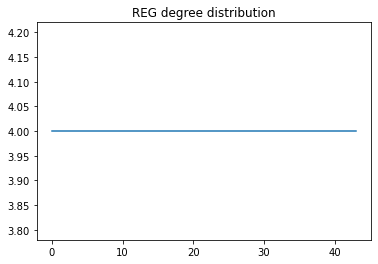

RGER


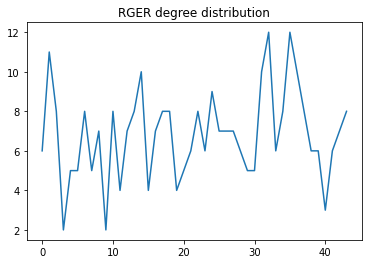

RGG


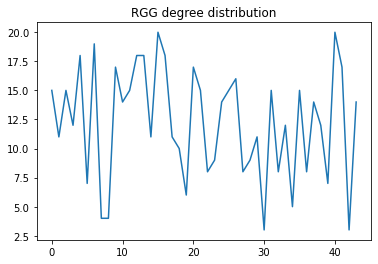

SF


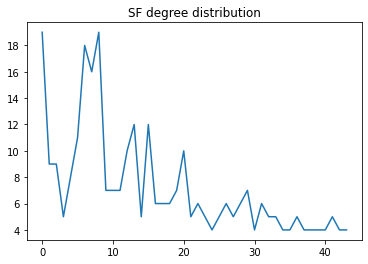

SW


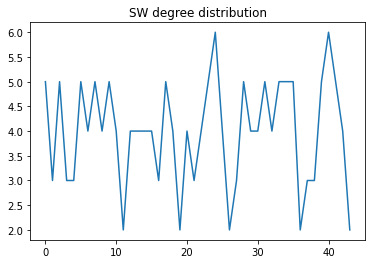

In [57]:
def find_degree(G):
    return np.array([v for (u, v) in nx.degree(G)])
    
REG_degree = find_degree(REG)
print ("REG")
plt.plot(REG_degree)
plt.title('REG degree distribution')
plt.show()

RGER_degree = find_degree(RGER)
print ("RGER")
plt.plot(RGER_degree)
plt.title('RGER degree distribution')
plt.show()

RGG_degree = find_degree(RGG)
print ("RGG")
plt.plot(RGG_degree)
plt.title('RGG degree distribution')
plt.show()

SF_degree = find_degree(SF)
print ("SF")
plt.plot(SF_degree)
plt.title('SF degree distribution')
plt.show()

SW_degree = find_degree(SW)
print ("SW")
plt.plot(SW_degree)
plt.title('SW degree distribution')
plt.show()

__C1.2__

In [58]:
print("Mean values \n")
print("REG mean node degree is : ", find_degree(REG).mean())

print("RGER mean node degree is : ", find_degree(RGER).mean())
print()

print("RGG mean node degree is : ", find_degree(RGG).mean())
print()

print("SF mean node degree is : ", find_degree(SF).mean())
print()

print("SW mean node degree is : ", find_degree(SW).mean())
print()
print("Variance values \n")

print("REG variance node degree is : ", find_degree(REG).var())
print()

print("RGER variance node degree is : ", find_degree(RGER).var())
print()

print("RGG variance node degree is : ", find_degree(RGG).var())
print()

print("SF variance node degree is : ", find_degree(SF).var())
print()

print("SW variance node degree is : ", find_degree(SW).var())

Mean values 

REG mean node degree is :  4.0
RGER mean node degree is :  6.818181818181818

RGG mean node degree is :  12.227272727272727

SF mean node degree is :  7.2727272727272725

SW mean node degree is :  4.0

Variance values 

REG variance node degree is :  0.0

RGER variance node degree is :  5.239669421487602

RGG variance node degree is :  22.81198347107438

SF variance node degree is :  16.289256198347104

SW variance node degree is :  1.1363636363636365


From the distribution diagrams we get a better picture of the degree of proximity of each node. You can see the differences between the RGER and the RGG graphs in terms of the greater variability of the degrees of the latter, the large degrees in a few nodes of the scale-free graph. The results of calculating the average value and covariance of each node are confirmed by the above diagrams.


### C2. Closeness centrality
##### C2.1 Represent the proximity distribution of nodes for each topology.
##### C2.2 Calculate the mean proximity as well as its dispersion for each topology.
##### Comment on the results.

__C2.1__

In [59]:
def find_closeness(G):
    return np.array(list(nx.closeness_centrality(G).items()))

REG


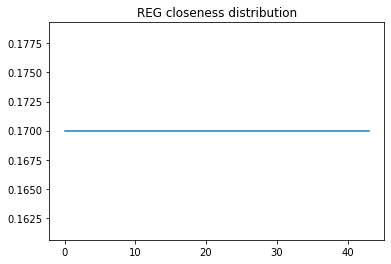

RGER


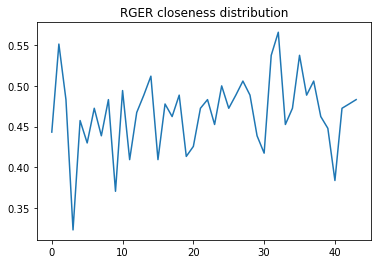

RGG


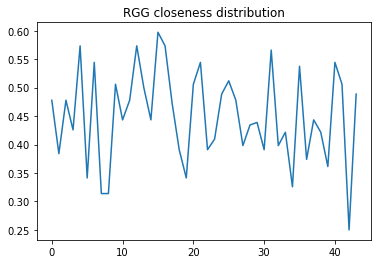

SF


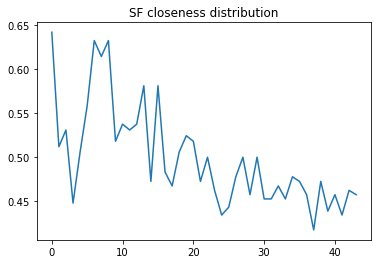

SW


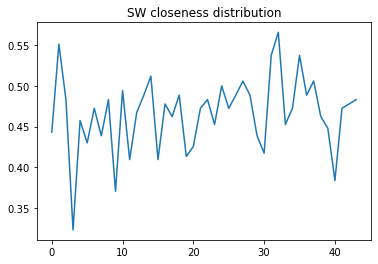

In [60]:
REG_closeness = find_closeness(REG)[:,1]
print ("REG")
plt.plot(REG_closeness)
plt.title('REG closeness distribution')
plt.show()

RGER_closeness = find_closeness(RGER)[:,1]
print ("RGER")
plt.plot(RGER_closeness)
plt.title('RGER closeness distribution')
plt.show()

RGG_closeness = find_closeness(RGG)[:,1]
print ("RGG")
plt.plot(RGG_closeness)
plt.title('RGG closeness distribution')
plt.show()

SF_closeness = find_closeness(SF)[:,1]
print ("SF")
plt.plot(SF_closeness)
plt.title('SF closeness distribution')
plt.show()

SW_closeness = find_closeness(SW)[:,1]
print ("SW")
plt.plot(RGER_closeness)
plt.title('SW closeness distribution')
plt.show()

__C2.2__

In [61]:
print("Mean values \n")
print("REG mean closeness is : ", find_closeness(REG)[:,1].mean())
print()
print("RGER mean closeness is : ", find_closeness(RGER)[:,1].mean())
print()
print("RGG mean closeness is : ", find_closeness(RGG)[:,1].mean())
print()
print("SF mean closeness is : ", find_closeness(SF)[:,1].mean())
print()
print("SW mean closeness is : ", find_closeness(SW)[:,1].mean())
print()

print("Variance values \n")
print()
print("REG variance closeness is : ", find_closeness(REG)[:,1].var())
print()
print("RGER variance closeness is : ", find_closeness(RGER)[:,1].var())
print()
print("RGG variance closeness is : ", find_closeness(RGG)[:,1].var())
print()
print("SF variance closeness is : ", find_closeness(SF)[:,1].var())
print()
print("SW variance closeness is : ", find_closeness(SW)[:,1].var())

Mean values 

REG mean closeness is :  0.1699604743083004

RGER mean closeness is :  0.4661637713465852

RGG mean closeness is :  0.4499897708345106

SF mean closeness is :  0.4989654560301213

SW mean closeness is :  0.32763833651788965

Variance values 


REG variance closeness is :  7.703719777548943e-34

RGER variance closeness is :  0.002097736954236084

RGG variance closeness is :  0.006629346960779025

SF variance closeness is :  0.0031642322617008198

SW variance closeness is :  0.0008663357101516048



We observe that closeness centrality diagrams are approximately the same in every topology except REG of course. At the same time, we see that the maximum mean centrality value is found in the SF topology. As we expected since closeness by definition is a measure of graph centrality, calculated as the inverse of the sum of the shortest paths between the node and all other nodes in the graph, the SW topology has the lowest average closeness. Recall that the SW topology had the largest (excluding REG) average maximum path length as well as the maximum diameter.

### C3. Betweenness centrality
##### C3.1 Represent the distribution of the intermediate centrality of nodes for each topology.
##### C3.2 Calculate the mean intermediate centrality as well as its dispersion for each topology.
##### Comment on the results.

__C3.1__

In [62]:
def find_betweenness(G):
    return np.array(list(nx.betweenness_centrality(G).items()))

REG


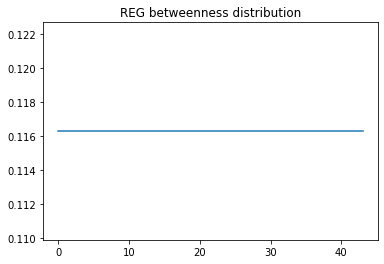

RGER


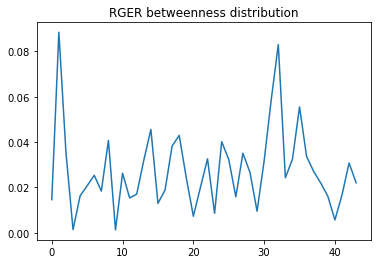

RGG


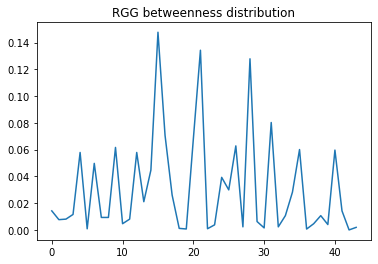

SF


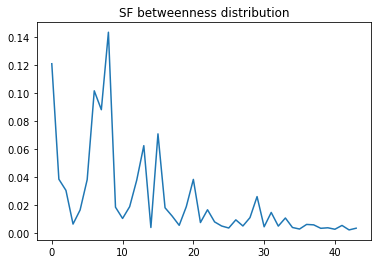

SW


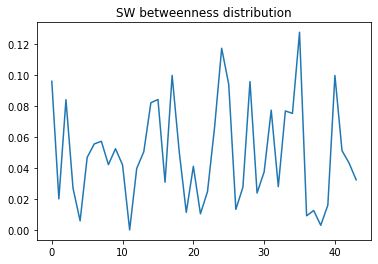

In [63]:
REG_betweenness = find_betweenness(REG)[:,1]
print ("REG")
plt.plot(REG_betweenness)
plt.title('REG betweenness distribution')
plt.show()

RGER_betweenness = find_betweenness(RGER)[:,1]
print ("RGER")
plt.plot(RGER_betweenness)
plt.title('RGER betweenness distribution')
plt.show()

RGG_betweenness = find_betweenness(RGG)[:,1]
print ("RGG")
plt.plot(RGG_betweenness)
plt.title('RGG betweenness distribution')
plt.show()

SF_betweenness = find_betweenness(SF)[:,1]
print ("SF")
plt.plot(SF_betweenness)
plt.title('SF betweenness distribution')
plt.show()

SW_betweenness = find_betweenness(SW)[:,1]
print ("SW")
plt.plot(SW_betweenness)
plt.title('SW betweenness distribution')
plt.show()

__C3.2__

In [64]:
print("Mean values \n")
print("REG mean betweenness is : ", find_betweenness(REG)[:,1].mean())
print()
print("RGER mean betweenness is : ", find_betweenness(RGER)[:,1].mean())
print()
print("RGG mean betweenness is : ", find_betweenness(RGG)[:,1].mean())
print()
print("SF mean betweenness is : ", find_betweenness(SF)[:,1].mean())
print()
print("SW mean betweenness is : ", find_betweenness(SW)[:,1].mean())
print()

print("Variance values \n")
print()
print("REG variance betweenness is : ", find_betweenness(REG)[:,1].var())
print()
print("RGER variance betweenness is : ", find_betweenness(RGER)[:,1].var())
print()
print("RGG variance betweenness is : ", find_betweenness(RGG)[:,1].var())
print()
print("SF variance betweenness is : ", find_betweenness(SF)[:,1].var())
print()
print("SW variance betweenness is : ", find_betweenness(SW)[:,1].var())

Mean values 

REG mean betweenness is :  0.11627906976744186

RGER mean betweenness is :  0.02781133595087084

RGG mean betweenness is :  0.031083257827443866

SF mean betweenness is :  0.024463908184838415

SW mean betweenness is :  0.04948152622571227

Variance values 


REG variance betweenness is :  3.983173294073602e-34

RGER variance betweenness is :  0.00032480968561374033

RGG variance betweenness is :  0.0013987097273380424

SF variance betweenness is :  0.001067075325904697

SW variance betweenness is :  0.0010798647447552968



For the same reasons mentioned above we see that the SW topology has the smallest index of betweenness centrality, while this time there is a fairly large variance, which did not happen in closeness centrality. The betweenness centrality quantifies how many times a node acts as a bridge along the shortest path between two other nodes, so it makes sense for the REG topology to have this index increased due to its shape.

### C4. Centrality Katz
##### C4.1 Represent the Katz centrality distribution of nodes for each topology.
To determine the $ alpha $ parameter of the katz_centrality function, compute the largest eigenvalue $ λ_ {max} $ of the neighborhood table with the adjacency_spectrum function of networkx.
H $ alpha $ is set to be equal to $ \ frac {1} {λ_ {max}} - 0.01 $.
##### C4.2 Calculate the mean Katz centrality as well as its dispersion for each topology.
##### Comment on the results.

__C4.1__

In [65]:
def find_katz(G):
    nx.adjacency_spectrum(G).max()
    a = (1/nx.adjacency_spectrum(G).max()-0.01).real
    return np.array(list(nx.katz_centrality(G, a).items()))

__C4.2__

In [66]:
print("Mean values \n")
print("REG mean katz is : ", find_katz(REG)[:,1].mean())
print()
print("RGER mean katz is : ", find_katz(RGER)[:,1].mean())
print()
print("RGG mean katz is : ", find_katz(RGG)[:,1].mean())
print()
print("SF mean katz is : ", find_katz(SF)[:,1].mean())
print()
print("SW mean katz is : ", find_katz(SW)[:,1].mean())
print()

print("Variance values \n")
print()
print("REG var katz is : ", find_katz(REG)[:,1].var())
print()
print("RGER var katz is : ", find_katz(RGER)[:,1].var())
print()
print("RGG var katz is : ", find_katz(RGG)[:,1].var())
print()
print("SF var katz is : ", find_katz(SF)[:,1].var())
print()
print("SW var katz is : ", find_katz(SW)[:,1].var())

Mean values 

REG mean katz is :  0.15075567228888173

RGER mean katz is :  0.14159411519519227

RGG mean katz is :  0.1369044907362425

SF mean katz is :  0.13716245951500447

SW mean katz is :  0.1413669105204878

Variance values 


REG var katz is :  0.0

RGER var katz is :  0.0026783792693633483

RGG var katz is :  0.003984433143522813

SF var katz is :  0.003913732427067481

SW var katz is :  0.00274266933716512



#### Identify, for each topology, the most central nodes in degree, proximity, intermediate centrality, and Katz centrality. Comment on the results.

In [67]:
def find_central(G):
    degree = []
    closeness = []
    betweenness = []
    katz = []
    
    max_degree = find_degree(G).max()
    max_closeness = find_closeness(G)[:,1].max()
    max_betweenness = find_betweenness(G)[:,1].max()
    max_katz = find_katz(G)[:,1].max()
    
    for i in range(n):
        if find_degree(G)[i] == max_degree:
            degree.append(i)
        if find_closeness(G)[:,1][i] == max_closeness:
            closeness.append(i)
        if find_betweenness(G)[:,1][i] == max_betweenness:
            betweenness.append(i)
        if find_katz(G)[:,1][i] == max_katz:
            katz.append(i)    
    return degree, closeness, betweenness, katz

In [68]:
print("Nodes with biggest centrality for each topology by degree, closeness, betweenness and katz centrality \n")

REG_central = find_central(REG)
RGER_central = find_central(RGER)
RGG_central = find_central(RGG)
SW_central = find_central(SW)
SF_central = find_central(SF)

print("REG nodes with biggest centrality by degree : {}" .format(REG_central[0]))
print("REG nodes with biggest centrality by closeness : {}" .format(REG_central[1]))
print("REG nodes with biggest centrality by betweenness : {}" .format(REG_central[2]))
print("REG nodes with biggest centrality by katz : {}" .format(REG_central[3]))
print()
print("RGER nodes with biggest centrality by degree : {}" .format(RGER_central[0]))
print("RGER nodes with biggest centrality by closeness : {}" .format(RGER_central[1]))
print("RGER nodes with biggest centrality by betweenness : {}" .format(RGER_central[2]))
print("RGER nodes with biggest centrality by katz : {}" .format(RGER_central[3]))
print()
print("RGG nodes with biggest centrality by degree : {}" .format(RGG_central[0]))
print("RGG nodes with biggest centrality by closeness : {}" .format(RGG_central[1]))
print("RGG nodes with biggest centrality by betweenness : {}" .format(RGG_central[2]))
print("RGG nodes with biggest centrality by katz : {}" .format(RGG_central[3]))
print()
print("SW nodes with biggest centrality by degree : {}" .format(SW_central[0]))
print("SW nodes with biggest centrality by closeness : {}" .format(SW_central[1]))
print("SW nodes with biggest centrality by betweenness : {}" .format(SW_central[2]))
print("SW nodes with biggest centrality by katz : {}" .format(SW_central[3]))
print()
print("SF nodes with biggest centrality by degree : {}" .format(SF_central[0]))
print("SF nodes with biggest centrality by closeness : {}" .format(SF_central[1]))
print("SF nodes with biggest centrality by betweenness : {}" .format(SF_central[2]))
print("SF nodes with biggest centrality by katz : {}" .format(SF_central[3]))

Nodes with biggest centrality for each topology by degree, closeness, betweenness and katz centrality 

REG nodes with biggest centrality by degree : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
REG nodes with biggest centrality by closeness : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
REG nodes with biggest centrality by betweenness : [1, 35, 36, 37, 38, 39, 41, 42]
REG nodes with biggest centrality by katz : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

RGER nodes with biggest centrality by degree : [32, 35]
RGER nodes with biggest centrality by closeness : [32]
RGER nodes with biggest centrality by betweenness : [1]
RGER 

Katz centrality calculates the relative influence of a node within a network by counting the number of immediate neighbors (first degree nodes) as well as all other nodes in the network connected to the node in question through these immediate neighbors. As we see the mean value for each topology does not differ much, which we observed in the other centrality metrics. The largest Katz centers are achieved in the REG and SW topology.

Comparing the various centrality metrics with each other we observe that there are several identical nodes with the greatest centrality in each topology for each centrality. In particular, we see that by comparing the various metrics with each other and seeing which nodes reappear having the highest value for different metrics, we can conclude as to the importance of a node with a greater degree of certainty.


We notice that:

- Nodes 32 and 35 are displayed in 2 metrics for the RGER topology.
- Node 15 is displayed in 4 metrics for the RGG topology.
- Nodes 17 and 40 appear in 2 metrics for the SW topology.
- Node 0 is displayed in 3 metrics for the SF topology.

### C5. Real Network PageRank Algorithm
##### Execute the pagerank algorithm on the forty (40th) largest connected component of the Stanford web-driven network whose edges are given in the web-Standord.txt file.
##### To compute the connected components, use the weakly_connected_components function of networkx.
More information about the dataset is given at the link https://snap.stanford.edu/data/web-Stanford.html.
##### Comment on the results.

__C5.__

In [69]:
G_web=nx.read_edgelist("./web-Stanford.txt",create_using=nx.DiGraph())

In [70]:
G_web_sorted = sorted(nx.weakly_connected_components(G_web), key=len, reverse=True)

In [71]:
print(G_web_sorted)

[{'250899', '46330', '135594', '226044', '117357', '149890', '202372', '253347', '190178', '278351', '181635', '20634', '196957', '255702', '116741', '241599', '54366', '104146', '168687', '180059', '192403', '65302', '157709', '6137', '275024', '126470', '62952', '124068', '236311', '202436', '10585', '180704', '4825', '51671', '77350', '9273', '189998', '22673', '268279', '34598', '261031', '223704', '89861', '53235', '268161', '214880', '279499', '65312', '114219', '270491', '196871', '254423', '29767', '25031', '186382', '235597', '132775', '260907', '185594', '214534', '271175', '188617', '270555', '87737', '74526', '223297', '207561', '244501', '129501', '188349', '108951', '156550', '152363', '44978', '202550', '95883', '174807', '159382', '98603', '206059', '132916', '69888', '28921', '247586', '133723', '135724', '33980', '226177', '261568', '226686', '55355', '258152', '192176', '217812', '75921', '93677', '278791', '81165', '82208', '242747', '14577', '233483', '136954', '89

In [72]:
len(G_web_sorted[39])

250

In [73]:
#find the 40th largest weakly connected component of the graph web-Stanford
G39 = G_web_sorted[39]

In [74]:
G39 = nx.DiGraph(G_web.subgraph(G39))

In [75]:
nx.pagerank(G39)

{'7794': 0.002574258613946976,
 '16819': 0.004,
 '11749': 0.004,
 '86391': 0.004,
 '56667': 0.004,
 '120780': 0.004,
 '240779': 0.004,
 '149906': 0.004004035099186067,
 '105098': 0.004,
 '96956': 0.004,
 '28551': 0.004,
 '238299': 0.004,
 '122161': 0.00418992789400051,
 '121595': 0.004,
 '36987': 0.004,
 '10506': 0.004626474788745187,
 '2608': 0.004,
 '93249': 0.004361650326172419,
 '138084': 0.0040009226258999765,
 '174871': 0.004,
 '104624': 0.004,
 '178753': 0.004,
 '237745': 0.004,
 '237344': 0.004,
 '227040': 0.004,
 '187016': 0.004,
 '85146': 0.004,
 '157838': 0.004,
 '15085': 0.004,
 '261425': 0.004,
 '235563': 0.004000254067722644,
 '216137': 0.004003800785392972,
 '84684': 0.004,
 '172115': 0.004004035099186067,
 '212802': 0.004,
 '135888': 0.004,
 '159383': 0.004000000250126483,
 '83700': 0.004,
 '221560': 0.004,
 '195502': 0.004,
 '269857': 0.004,
 '210705': 0.004,
 '67813': 0.004,
 '203215': 0.002574258613946976,
 '110864': 0.004,
 '149408': 0.004,
 '218346': 0.004000027970


The PageRank algorithm is a distribution of probabilities used to represent the probability that a person going from link to link will end up on a specific page. The algorithm takes into account the importance of the page that gives the "vote" for another page. If the page you are voting on is more relevant, the links are worth more and will help rank the other pages.


The importance of the page is equal to the sum of the votes of its inbound links. Running the PageRank algorithm we see that the PageRank centrality of node '83700' is 0.004 while that of node '213346' is 0.004000179119935622, which practically means that there is more probability that someone will go to node '213346' than to node '83700' random page.

### D) Study of coherence and robustness of networks

### D1. Consistency study
For each type of complex network, the coherence rate for a number of generated topologies is defined as the fraction of the connected topologies in relation to the number of all generated topologies.

Based on the parameter values ​​of Table 2, study the coherence of each type of complex network in Table 1.

<table>
    <thead>
        <tr>
            <th>Topology</th>
            <th>Parameter Range</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td >REG</td>
            <td rowspan=6>$n = \{100, 200\}$</td>
            <td>$d \in [2,10]$ with step $2$</td>
        </tr>
        <tr>
            <td>RGER</td>
            <td>$M \in [100,800]$ with step $100$</td>
        </tr>
        <tr>
            <td>RG-Gilbert</td>
            <td>$p \in [0.01,0.1]$ with step $0.01$</td>
        </tr>
        <tr>
            <td>RGG</td>
            <td>$R \in [0.025,0.25]$ with step $0.025$</td>
        </tr>
        <tr>
            <td>SF</td>
            <td>$d \in [2,10]$ with step $2$</td>
        </tr>
        <tr>
            <td>SW</td>
            <td>$d \in [2,10]$ with step $2$ and $g_p \in [0.1,0.7]$ with step $0.1$</td>
        </tr>
    </tbody>
    <caption>Table 2</caption>
</table>

#### D1.1 For each network type, generate 100 different topologies and present the coherence rate diagram in relation to the defined parameters of each network.
#### D1.2 In which cases do threshold effects occur?
#### D1.3 What are the critical values ​​for each type of network that lead to phase transitions?
#### D1.4 Which phase transitions are sharp and which are smooth?

__D1.1__

REG TOPOLOGY CONNECTION

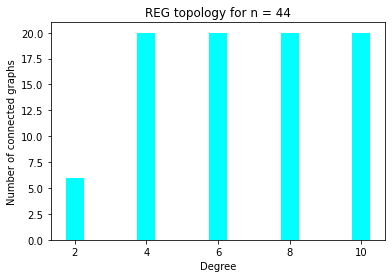

[2, 20, 20, 20, 20]


In [76]:
def connection_coef_REG():
    connected = [0] * 5 
    d = [2, 4, 6, 8, 10]
    for i in range(100):
        REG = nx.random_regular_graph(d[i % 5], 100 + i)
        if nx.is_connected(REG):
            connected[i%5] += 1
    return(connected)

# plot example:
plt.bar(list(range(2,12,2)),connection_coef_REG(), width=0.5, color='cyan')
plt.title("REG topology for n = %d" %n)
plt.ylabel("Number of connected graphs")
plt.xlabel("Degree")
plt.show()
        
print(connection_coef_REG())

RGER TOPOLOGY CONNECTION

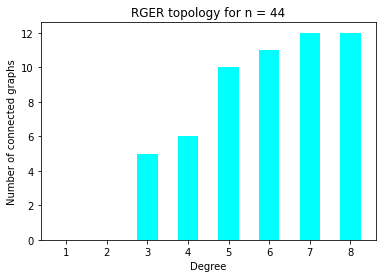

[0, 0, 3, 6, 8, 11, 12, 12]


In [77]:
def connection_coef_RGER():
    connected = [0] * 8
    M = [100, 200, 300, 400, 500, 600, 700, 800]
    for i in range(100):
        RGER =  nx.gnm_random_graph(100 + i, M[i % 8])
        if nx.is_connected(RGER):
            connected[i % 8] += 1
    return(connected)

plt.bar(list(range(1, 9, 1)),connection_coef_RGER(), width=0.5, color='cyan')
plt.title("RGER topology for n = %d" %n)
plt.ylabel("Number of connected graphs")
plt.xlabel("Degree")
plt.show()

print(connection_coef_RGER())

RG-Gilbert TOPOLOGY CONNECTION

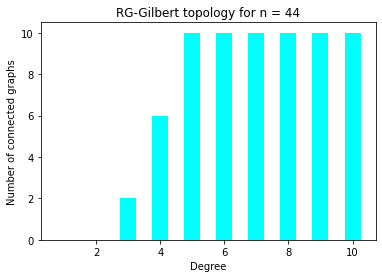

[0, 0, 3, 7, 9, 8, 10, 10, 10, 10]


In [78]:
def connection_coef_RG():
    connected = [0] * 10
    p = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
    for i in range(100):
        RGG =  nx.gnp_random_graph(100 + i, p[i % 10])
        if nx.is_connected(RGG):
            connected[i % 10] += 1
    return(connected)

plt.bar(list(range(1, 11, 1)),connection_coef_RG(), width=0.5, color='cyan')
plt.title("RG-Gilbert topology for n = %d" %n)
plt.ylabel("Number of connected graphs")
plt.xlabel("Degree")
plt.show()

print(connection_coef_RG())

RGG TOPOLOGY CONNECTION

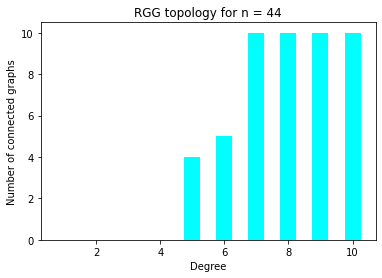

[0, 0, 0, 0, 4, 7, 8, 10, 10, 10]


In [79]:
def connection_coef_RGG():
    connected = [0] * 10
    R = [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25]
    for i in range(100):
        RGG =  nx.random_geometric_graph(100 + i, R[i % 10])
        if nx.is_connected(RGG):
            connected[i % 10] += 1
    return(connected)

plt.bar(list(range(1, 11, 1)),connection_coef_RGG(), width=0.5, color='cyan')
plt.title("RGG topology for n = %d" %n)
plt.ylabel("Number of connected graphs")
plt.xlabel("Degree")
plt.show()


print(connection_coef_RGG())

SF TOPOLOGY CONNECTION

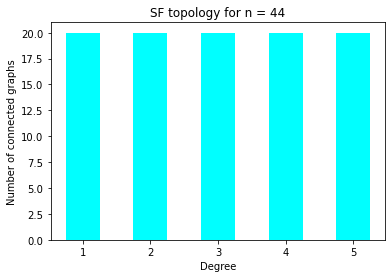

[20, 20, 20, 20, 20]


In [80]:
def connection_coef_SF():
    connected = [0] * 5
    d = [2, 4, 6, 8, 10]
    for i in range(100):
        SF = nx.barabasi_albert_graph(100 + i, d[i % 5])
        if nx.is_connected(SF):
            connected[i % 5] += 1
    return(connected)

plt.bar(list(range(1, 6, 1)), connection_coef_SF(), width=0.5, color='cyan')
plt.title("SF topology for n = %d" %n)
plt.ylabel("Number of connected graphs")
plt.xlabel("Degree")
plt.show()

print(connection_coef_SF())

SW TOPOLOGY CONNECTION

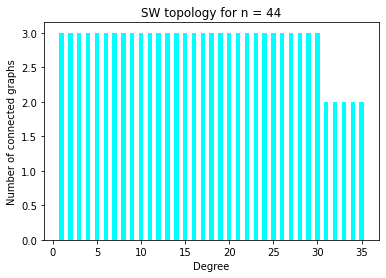

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2]


In [81]:
def connection_coef_SW():
    connected = [0] * 7 * 5
    d = [2, 4, 6, 8, 10]
    g = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    for i in range(100):
        SW = nx.connected_watts_strogatz_graph(100 + i, d[i % 5], g[i % 7])
        if nx.is_connected(SW):
            connected[i % 35] += 1
    return(connected)

plt.bar(list(range(1, 36, 1)), connection_coef_SW(), width=0.5, color='cyan')
plt.title("SW topology for n = %d" %n)
plt.ylabel("Number of connected graphs")
plt.xlabel("Degree")
plt.show()

print(connection_coef_SW())

__D1.2__

In REG graphs for d from 20 and above we observe a sharp increase.
In the RGER graphs for a parameter value from 300-400 we observe a sharp increase in the connected graphs, and finally In the RGG graphs there is a threshold effect for the change of the parameter from 1.0 to 1.25!

__D1.3__

The critical values in cases where a threshold effect occurs are:

- REG: d >= 20
- RGER: M = 300 - 400
- RGG: R = 1.00 - 1.25

__D1.4__

Taking into account that how steep the phase transitions are depends on how many values we control, as it would be smoother those for which we tested many intermediate values ​​(eg 1,2,3,4 .... 17, 18, 19, 20) from the ones we tried less (eg 1,5,10,15,20), we would say that the transitions to REG and RGG are sharper than that to RGER, judging by the diagrams.

### D2. Network robustness study

#### For each of the topologies REG, RG (ER), RGG, SF (BA) and SW (WS) examined in sections B and C, calculate with the minimum_node_cut function the minimum number of nodes to be removed to create an offline network.
#### Comment on the results.

__D2.__

In [82]:
def find_cut(G):
    num_nodes = len(nx.minimum_node_cut(G))
    return(num_nodes)

In [83]:
print("REG Number of nodes to cut for connectivity loss is: {}" .format(find_cut(REG)))
print()
print("RGER Number of nodes to cut for connectivity loss is: {}" .format(find_cut(RGER)))
print()
print("RGG Number of nodes to cut for connectivity loss is: {}" .format(find_cut(RGG)))
print()
print("SF Number of nodes to cut for connectivity loss is: {}" .format(find_cut(SF)))
print()
print("SW Number of nodes to cut for connectivity loss is: {}" .format(find_cut(SW)))

REG Number of nodes to cut for connectivity loss is: 4

RGER Number of nodes to cut for connectivity loss is: 2

RGG Number of nodes to cut for connectivity loss is: 2

SF Number of nodes to cut for connectivity loss is: 4

SW Number of nodes to cut for connectivity loss is: 2


Network robustness is usually defined as the ability of a network to maintain functionality (or connectivity) when performing a sequential node removal (attack) strategy. We see that the number of nodes is equal for the topologies RGER, RGG, SW, as well as for REG and SF.

### E) Study of the evolutionary conversion of REG network into SW and RGER network

##### Changing the $ g_p $ parameter from $ 0 $ to $ 1 $ with a step of $ 0.1 $ of the function that constructs SW topologies of size $ n = 30x $ (replace x with the last digit of AM) with degree grid $ d = 4 $, find the average path length and the average grouping factor. How does the generated network behave for $ g_p = 0 $, how for $ g_p = 1 $ and how for intermediate prices $ g_p \simeq 0.1 - 0.5 $?

__E.__

In [84]:
random.seed(seedno)
n=304
d=4

g = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
connected = 0
for i in range(11):
    SW = nx.watts_strogatz_graph(n, d, g[i % 11])
    SW_path_lengths = compute_path_lengths(SW)
    SW_clust = cc(SW)
    print("Gp = ", g[i % 11], "Mean path length: ", np.array(SW_path_lengths[0]).mean())
    print("Gp = ", g[i % 11], "Mean clustering ", np.array(SW_clust[0]).mean())
    if nx.is_connected(SW):
        connected += 1
    
print(connected/10)

Gp =  0 Mean path length:  38.25
Gp =  0 Mean clustering  0.5
Gp =  0.1 Mean path length:  7.07898502392091
Gp =  0.1 Mean clustering  0.5
Gp =  0.2 Mean path length:  5.481354017148852
Gp =  0.2 Mean clustering  0.5
Gp =  0.3 Mean path length:  4.9891532250660315
Gp =  0.3 Mean clustering  0.3333333333333333
Gp =  0.4 Mean path length:  4.713775615044648
Gp =  0.4 Mean clustering  0.3333333333333333
Gp =  0.5 Mean path length:  4.503277403927149
Gp =  0.5 Mean clustering  0.0
Gp =  0.6 Mean path length:  4.405336974505536
Gp =  0.6 Mean clustering  0.0
Gp =  0.7 Mean path length:  4.47451935783662
Gp =  0.7 Mean clustering  0.0
Gp =  0.8 Mean path length:  4.338502558463854
Gp =  0.8 Mean clustering  0.0
Gp =  0.9 Mean path length:  4.297953199158048
Gp =  0.9 Mean clustering  0.047619047619047616
Gp =  1 Mean path length:  4.34231884679865
Gp =  1 Mean clustering  0.0
1.1



Evolutionary transformation commentary:

We observe that for Gp = 0 the average path length is constant and equal to 38.25. We also observe that for values ​​from 0.1 to 0.5 we see a typically downward trend in the average path length, while it also seems that we take the minimum length for Gp values ​​around 0.8-0.9. For Gp = 1 the length does not remain constant and varies from about 6-12 in the graphs we produce here.

### Z) Real network type identification
##### For the actual network given in the got.txt file and for the interactions of Game of Thrones characters in the first episode cycle (https://github.com/mathbeveridge/gameofthrones) find:</p>
<ol>
    <li>The distribution of the node grade and the average grade.</li>
    <li>The distribution of the clusterin coefficient factor and the average clusterin coefficient factor.</li>
    <li>The average path length.</li>
</ol>
<p style=text-align:justify>Visualize the network. Compare the results with those of synthetic topologies. Describe the type of topology based on the types of networks examined in sections B, C..</p>

__Z__

In [85]:
#read csv
import csv
G_got=nx.Graph() #the graph of the GOT characters
with open('got.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
            G_got.add_edge(row[0],row[1],weight=row[2])
            line_count += 1

__Ζ.1__

G_got


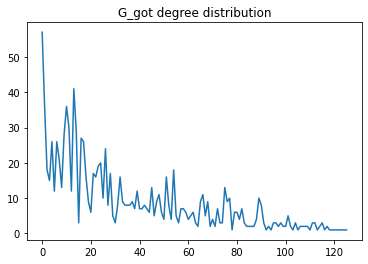

Mean degree for GoT Graph is : 8.714285714285714 


In [86]:
find_degree(G_got)
    
G_got_degree = find_degree(G_got)
print ("G_got")
plt.plot(G_got_degree)
plt.title('G_got degree distribution')
plt.show()

print("Mean degree for GoT Graph is : {} ".format(find_degree(G_got).mean()))

__Ζ.2__

G_got


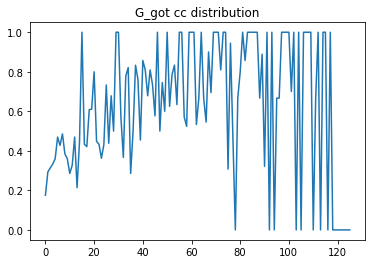

Mean cc for GoT Graph is : 0.6296612631071081 


In [87]:
cc(G_got)

G_got_cc = cc(G_got)
print("G_got")
plt.plot(list(G_got_cc.values()))
plt.title('G_got cc distribution')
plt.show()

print("Mean cc for GoT Graph is : {} " .format(nx.average_clustering(G_got)))


__Ζ.3__

In [88]:
print("Mean average got path length is : {}" .format(nx.average_shortest_path_length(G_got)))

Mean average got path length is : 2.6446984126984128


Visualization of GoT Graph 
Compare the results with those of synthetic topologies. Describe the type of topology based on the types of networks examined in sections B, C.

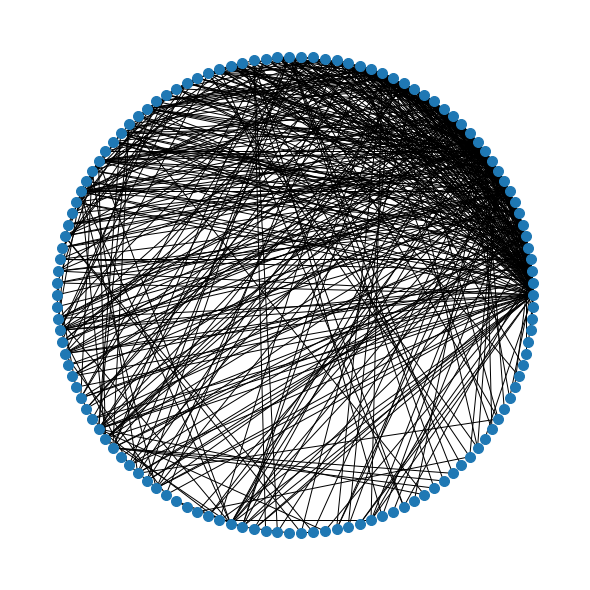

In [89]:
plt.figure(figsize=(8, 8))
plt.show(nx.draw_circular(G_got, node_size=100))


#### Who were the 5 main characters of the first episode in terms of degree, proximity and intermediation?

Most important characters by degree metric

In [90]:
names = list(G_got.nodes())
print(names)

['NED', 'ROBERT', 'DAENERYS', 'JORAH', 'JON', 'SAM', 'LITTLEFINGER', 'VARYS', 'DROGO', 'ARYA', 'CATELYN', 'ROBB', 'BRONN', 'TYRION', 'CERSEI', 'SHAE', 'JOFFREY', 'SANSA', 'PYCELLE', 'VISERYS', 'SEPTA_MORDANE', 'TYWIN', 'JEOR', 'THEON', 'BRAN', 'MAESTER_LUWIN', 'JAIME', 'LORAS', 'RENLY', 'MIRRI_MAZ_DUUR', 'SYRIO_FOREL', 'JORY_CASSEL', 'PYP', 'ROS', 'GRENN', 'WALDER', 'DOREAH', 'BENJEN', 'IRRI', 'GREATJON_UMBER', 'MORD', 'LYSA', 'RAKHARO', 'ROBIN', 'OSHA', 'RODRIK', 'QOTHO', 'MAESTER_AEMON', 'BARRISTAN', 'ILLYRIO', 'SHAGGA', 'YOREN', 'ALLISER_THORNE', 'WINE_MERCHANT', 'HOUND', 'LANCEL', 'RICKON', 'MARILLION', 'KEVAN', 'VARDIS_EGEN', 'RHAEGO', 'JANOS', 'GENDRY', 'HOT_PIE', 'LOMMY_GREENHANDS', 'MERYN_TRANT', 'JON_ARRYN', 'HODOR', 'STANNIS', 'MAGO', 'MYCAH', 'TOBHO_MOTT', 'RAST', 'OLD_NAN', 'MHAEGEN', 'AERYS', 'BAELOR', 'DAREON', 'STABLE_BOY', 'HUGH_OF_THE_VALE', 'OTHELL_YARWYCK', 'OTHOR', 'MOUNTAIN', 'TOMARD', 'GARED', 'ROYCE', 'JONOS_BRACKEN', 'MASHA_HEDDLE', 'RICKARD_STARK', 'ILYN_PAYNE'

In [91]:
degree = find_degree(G_got)
sort_index_degree = np.argsort(degree)[::-1]
print("5 most important characters sorted by degree are : {}" .format(sort_index_degree[0:5]))
print()
print("Their names are : \n")
print("1st is : ", names[sort_index_degree[0]])
print("2nd is : ", names[sort_index_degree[1]])
print("3rd is : ", names[sort_index_degree[2]])
print("4th is : ", names[sort_index_degree[3]])
print("5th is : ", names[sort_index_degree[4]])

5 most important characters sorted by degree are : [ 0 13 10  1 11]

Their names are : 

1st is :  NED
2nd is :  TYRION
3rd is :  CATELYN
4th is :  ROBERT
5th is :  ROBB


Most important characters by closseness metric

In [92]:
closseness = find_closeness(G_got)[:,1]
sort_index_closs = np.argsort(closseness)[::-1]
sort_index_closs = np.argsort(closseness)[::-1]
print("5 most important characters sorted by closeness are : {}" .format(sort_index_closs[0:5]))
print()
print("Their names are : \n")
print("1st is : ", names[sort_index_closs[0]])
print("2nd is : ", names[sort_index_closs[1]])
print("3rd is : ", names[sort_index_closs[2]])
print("4th is : ", names[sort_index_closs[3]])
print("5th is : ", names[sort_index_closs[4]])

5 most important characters sorted by closeness are : [ 0  1 10 13  4]

Their names are : 

1st is :  NED
2nd is :  ROBERT
3rd is :  CATELYN
4th is :  TYRION
5th is :  JON


Most important characters by betweeness metric

In [93]:
bet = find_betweenness(G_got)[:,1]
betn = bet.astype(float)
sort_index_betn = np.argsort(betn)[::-1]
print("5 most important characters sorted by betweenness are : {}" .format(sort_index_betn[0:5]))
print()
print("Their names are : \n")
print("1st is : ", names[sort_index_betn[0]])
print("2nd is : ", names[sort_index_betn[1]])
print("3rd is : ", names[sort_index_betn[2]])
print("4th is : ", names[sort_index_betn[3]])
print("5th is : ", names[sort_index_betn[4]])

5 most important characters sorted by betweenness are : [ 0 13 10  1  2]

Their names are : 

1st is :  NED
2nd is :  TYRION
3rd is :  CATELYN
4th is :  ROBERT
5th is :  DAENERYS
